In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [5]:
# Combine the data into a single DataFrame
#mouse_study_combine = pd.merge(mouse_metadata, study_results, how = 'outer', on='Mouse ID')
mouse_study_combine = pd.merge(mouse_metadata,study_results, on='Mouse ID')

In [6]:
mouse_study_combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
number_of_mice = len(mouse_study_combine.groupby('Mouse ID').count())
number_of_mice

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint

duplicated_mouse =mouse_study_combine[mouse_study_combine.duplicated(['Mouse ID', 'Timepoint'])]
#print(duplicated_mouse)
duplicate_mouse_ids = mouse_study_combine.loc[mouse_study_combine.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()


In [9]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
print(duplicate_mouse_ids)

['g989']


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_ID = mouse_study_combine.loc[mouse_study_combine["Mouse ID"] == "g989"]
duplicate_mouse_ID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_id = mouse_study_combine[mouse_study_combine['Mouse ID'].isin(duplicate_mouse_ids)==False]

In [12]:
# Checking the number of mice in the clean DataFrame
print(len(clean_mouse_id.groupby('Mouse ID').count()))



248


In [13]:
#Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Tumor_vol_mean = clean_mouse_id.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean().map('{:6f}'.format)
Tumor_vol_median = clean_mouse_id.groupby('Drug Regimen')["Tumor Volume (mm3)"].median().map('{:6f}'.format)
Tumor_vol_variance = clean_mouse_id.groupby('Drug Regimen')["Tumor Volume (mm3)"].var().map('{:6f}'.format)
Tumor_vol_stddev = clean_mouse_id.groupby('Drug Regimen')["Tumor Volume (mm3)"].std().map('{:6f}'.format)
Tumor_vol_sem = clean_mouse_id.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem().map('{:6f}'.format)
summary_table = pd.DataFrame({'Mean Tumor Volume' : Tumor_vol_mean ,'Median Tumor Volume' : Tumor_vol_median,'Tumor Volume Variance' : Tumor_vol_variance,'Tumor Volume Std. Dev.' : Tumor_vol_stddev, 'Tumor Volume Std. Err.' : Tumor_vol_sem})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate = clean_mouse_id.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

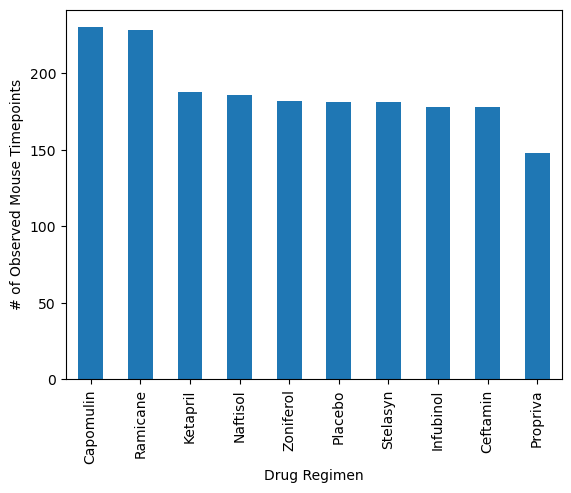

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_mouse_id["Drug Regimen"].value_counts() 
plot_pandas = mice_count.plot.bar(color = 'tab:blue')
plt.xlabel("Drug Regimen") 
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

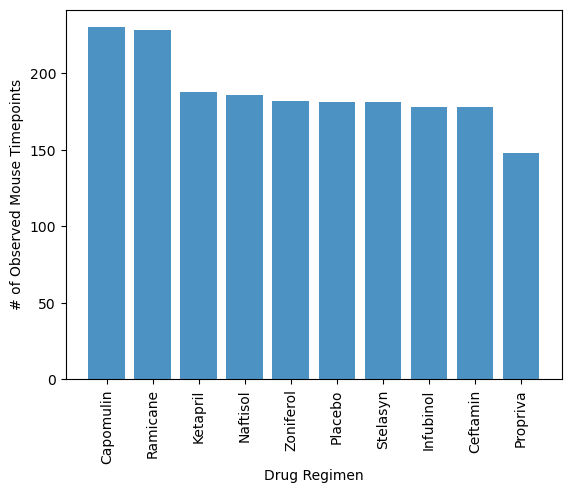

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color = 'tab:blue', alpha = 0.8, align = 'center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

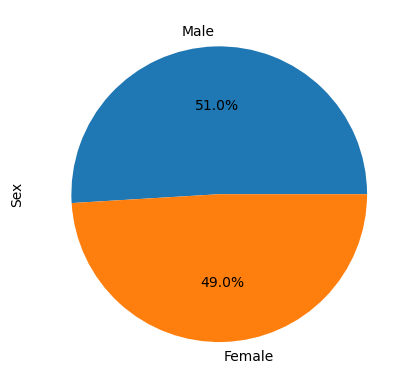

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_female_male = clean_mouse_id["Sex"].value_counts() 
data_female_male.plot.pie(autopct = "%1.1f%%") 
plt.show()

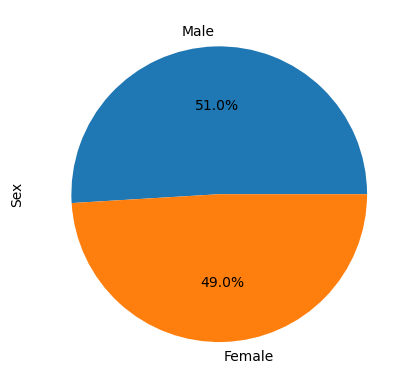

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.0, 51.0] 
plot = data_female_male.plot.pie(y = 'Total Count', autopct = "%1.1f%%")
plt.ylabel('Sex')
plt.show()

In [20]:
#Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_reg = clean_mouse_id.loc[clean_mouse_id["Drug Regimen"] == "Capomulin",:]
Ramicane_reg = clean_mouse_id.loc[clean_mouse_id["Drug Regimen"] == "Ramicane", :]
Infubinol_reg = clean_mouse_id.loc[clean_mouse_id["Drug Regimen"] == "Infubinol", :]
Ceftamin_reg = clean_mouse_id.loc[clean_mouse_id["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
Capomulin_great = Capomulin_reg.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_great)
Capomulin_merge = pd.merge(Capomulin_volume, clean_mouse_id, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

#Ramicane
Ramicane_great = Ramicane_reg.groupby('Mouse ID').max()['Timepoint']
Ramicane_volume = pd.DataFrame(Ramicane_great)
Ramicane_merge = pd.merge(Ramicane_volume, clean_mouse_id, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

#Infubinol
Infubinol_great = Infubinol_reg.groupby('Mouse ID').max()['Timepoint']
Infubinol_volume = pd.DataFrame(Infubinol_great)
Infubinol_merge = pd.merge(Infubinol_volume, clean_mouse_id, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

#Ceftamin
Ceftamin_great = Ceftamin_reg.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volume = pd.DataFrame(Ceftamin_great)
Ceftamin_merge = pd.merge(Ceftamin_volume, clean_mouse_id, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

cap_quartiles = Capomulin_tumors.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq


cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(cap_quartiles)
print(cap_lowerq)
print(cap_upperq)
print(cap_iqr)
print(cap_lower_bound)
print(cap_upper_bound)

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
32.37735684
40.1592203
7.781863460000004
20.70456164999999
51.83201549


In [23]:
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

ram_quartiles = Ramicane_tumors.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq


ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(ram_quartiles)
print(ram_lowerq)
print(ram_upperq)
print(ram_iqr)
print(ram_lower_bound)
print(ram_upper_bound)

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
31.56046955
40.65900627
9.098536719999998
17.912664470000003
54.30681135


In [24]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

inf_quartiles = Infubinol_tumors.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq


inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

print(inf_quartiles)
print(inf_lowerq)
print(inf_upperq)
print(inf_iqr)
print(inf_lower_bound)
print(inf_upper_bound)

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
54.04860769
65.52574285
11.477135160000003
36.83290494999999
82.74144559000001


In [25]:
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

cef_quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq


cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

print(cef_quartiles)
print(cef_lowerq)
print(cef_upperq)
print(cef_iqr)
print(cef_lower_bound)
print(cef_upper_bound)

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
48.72207785
64.29983003
15.577752179999997
25.355449580000002
87.66645829999999


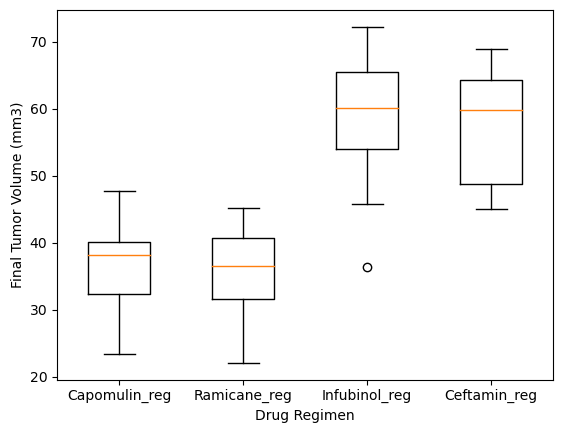

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin_reg', 'Ramicane_reg', 'Infubinol_reg','Ceftamin_reg']

fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.5, vert=True)
plt.show()

In [27]:
#Line and Scatter Plots

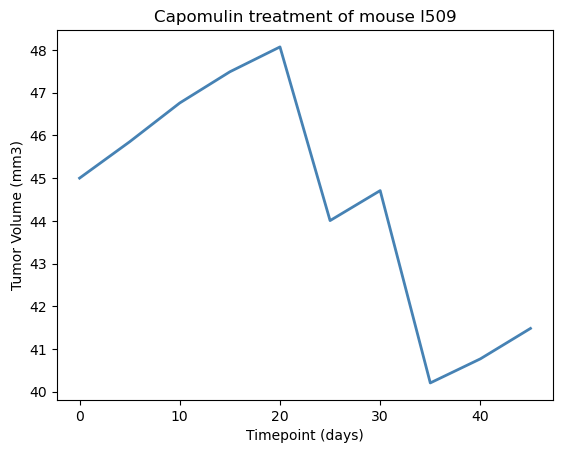

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_mouse_id.loc[clean_mouse_id["Drug Regimen"] == "Capomulin",:] 
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()

plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, tumor_size, linewidth = 2, color = "steelblue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

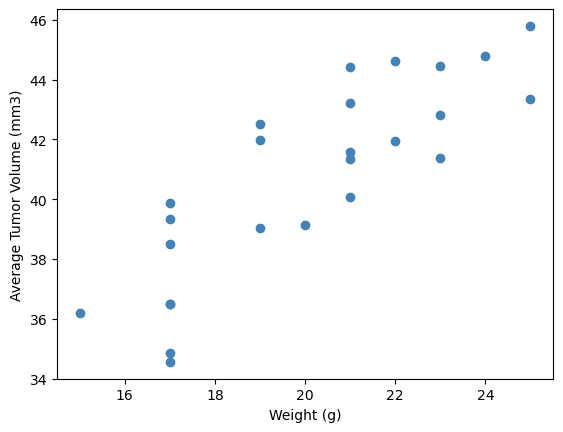

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capo_vol = capomulin_df.groupby(['Mouse ID']).mean()


#Format
plt.scatter(avg_capo_vol['Weight (g)'], avg_capo_vol['Tumor Volume (mm3)'], color = "steelblue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
marker_size = 15
plt.show()

In [30]:
#Correlation and Regression

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Calculating the line of best fit
